# Import libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.stattools import adfuller


# Load your dataset

In [11]:
# Load your dataset
data = pd.read_csv('/Users/lilianngonadi/Downloads/exchange2.csv')
# Drop the 'Rate Date' column
data = data.drop(columns=['Rate Date'])

# Display the first few rows to confirm the column is dropped
data.head()
data

,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,US DOLLAR,2024,July,1533.5590,1534.0590,1534.5590
1,POUNDS STERLING,2024,July,1981.0515,1981.6974,1982.3433
2,EURO,2024,July,1668.8189,1669.3630,1669.9071
3,SWISS FRANC,2024,July,1724.2624,1724.8246,1725.3868
4,YEN,2024,July,9.7810,9.7842,9.7874
...,...,...,...,...,...,...
55530,CFA,2001,December,0.1514,0.1521,0.1528
55531,EURO,2001,December,99.3787,99.8230,100.2670
55532,WAUA,2001,December,138.8876,139.5084,140.1293
55533,US DOLLAR,2001,December,111.8500,112.3500,112.8500


# US dollar to Naira Volatility

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the dataset for currencies 'US DOLLAR'
usd_naira_data = data[data['Currency'].isin(['US DOLLAR'])]

# Group the filtered data by 'Rate Year' and 'Currency', then calculate the standard deviation for 'Central Rate'
volatility_usd_naira = usd_naira_data.groupby(['Rate Year', 'Currency'])['Central Rate'].std().reset_index()

# Rename columns for clarity
volatility_usd_naira.columns = ['Rate Year', 'Currency', 'Volatility']

# Display the resulting DataFrame
volatility_usd_naira

,Rate Year,Currency,Volatility
0,2001,US DOLLAR,0.226738
1,2002,US DOLLAR,5.282734
2,2003,US DOLLAR,79.799218
3,2004,US DOLLAR,1.084051
4,2005,US DOLLAR,1.662802
5,2006,US DOLLAR,0.597025
6,2007,US DOLLAR,4.570127
7,2008,US DOLLAR,4.761929
8,2009,US DOLLAR,2.755291
9,2010,US DOLLAR,0.480567


# correlation matrix

In [13]:
# Filter data for the specified currencies
selected_currencies = data[data['Currency'].isin(['US DOLLAR', 'EURO', 'POUNDS STERLING', 'SWISS FRANC', 'YEN'])]

# Pivot the data to have dates as rows and currencies as columns with central rates as values
pivoted_data = selected_currencies.pivot_table(index=['Rate Year', 'Rate Month'], columns='Currency', values='Central Rate', aggfunc='mean')

# Calculate the correlation matrix
correlation_matrix = pivoted_data.corr()

# Display the correlation matrix
correlation_matrix


Currency,EURO,POUNDS STERLING,SWISS FRANC,US DOLLAR,YEN
Currency,,,,,
EURO,1.000000,-0.007135,0.044807,0.061621,0.044166
POUNDS STERLING,-0.007135,1.000000,0.995617,-0.006941,-0.022219
SWISS FRANC,0.044807,0.995617,1.000000,0.998351,0.974288
US DOLLAR,0.061621,-0.006941,0.998351,1.000000,0.953631
YEN,0.044166,-0.022219,0.974288,0.953631,1.000000


# Granger causality tests

In [14]:
from statsmodels.tsa.stattools import grangercausalitytests

# Drop rows with any missing values to ensure clean data for the test
clean_data = pivoted_data.dropna()

# Define the function to perform Granger Causality test
def test_granger_causality(data, var1, var2, maxlag=4):
    """
    Test Granger causality between two variables.
    data: DataFrame containing the time series data
    var1: the name of the first variable (cause)
    var2: the name of the second variable (effect)
    maxlag: Maximum number of lags to test for
    """
    test_result = grangercausalitytests(data[[var1, var2]], maxlag=maxlag, verbose=True)
    return test_result

# Perform Granger causality tests for the specified pairs
results_swiss_usd = test_granger_causality(clean_data, 'SWISS FRANC', 'US DOLLAR')
results_swiss_pounds = test_granger_causality(clean_data, 'SWISS FRANC', 'POUNDS STERLING')
results_usd_yen = test_granger_causality(clean_data, 'US DOLLAR', 'YEN')

# Displaying results in a readable format would be too verbose here, so we'll focus on summarizing the p-values.
def summarize_results(results):
    """
    Summarize the Granger causality test results to show only the p-values of the tests.
    """
    summary = {lag: round(result[0]['ssr_chi2test'][1], 4) for lag, result in results.items()}
    return summary

summary_swiss_usd = summarize_results(results_swiss_usd)
summary_swiss_pounds = summarize_results(results_swiss_pounds)
summary_usd_yen = summarize_results(results_usd_yen)

summary_swiss_usd, summary_swiss_pounds, summary_usd_yen




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6964  , p=0.1941  , df_denom=223, df_num=1
ssr based chi2 test:   chi2=1.7193  , p=0.1898  , df=1
likelihood ratio test: chi2=1.7128  , p=0.1906  , df=1
parameter F test:         F=1.6964  , p=0.1941  , df_denom=223, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4708  , p=0.2320  , df_denom=220, df_num=2
ssr based chi2 test:   chi2=3.0084  , p=0.2222  , df=2
likelihood ratio test: chi2=2.9884  , p=0.2244  , df=2
parameter F test:         F=1.4708  , p=0.2320  , df_denom=220, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8717  , p=0.4565  , df_denom=217, df_num=3
ssr based chi2 test:   chi2=2.6995  , p=0.4403  , df=3
likelihood ratio test: chi2=2.6833  , p=0.4431  , df=3
parameter F test:         F=0.8717  , p=0.4565  , df_denom=217, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0617  , p=0.3764  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


({1: 0.1898, 2: 0.2222, 3: 0.4403, 4: 0.3515},
 {1: 0.0358, 2: 0.0186, 3: 0.0761, 4: 0.2959},
 {1: 0.2056, 2: 0.2455, 3: 0.0882, 4: 0.0414})

In [15]:
# volatility statistics

In [16]:
# Calculate the overall volatility (standard deviation) for each currency over the entire dataset
overall_volatility = data.groupby('Currency')['Central Rate'].std().sort_values()

# Identify the most and least volatile currencies
least_volatile = overall_volatility.idxmin()
most_volatile = overall_volatility.idxmax()
least_volatile_value = overall_volatility.min()
most_volatile_value = overall_volatility.max()

least_volatile, least_volatile_value, most_volatile, most_volatile_value


('CFA ', 0.0009192388155424891, 'POUNDS STERLING', 34208.22232866936)

# summary statistics for USD

In [17]:
# Filter data for USD only
usd_data = data[data['Currency'] == 'US DOLLAR']

# Calculate summary statistics for each year for USD
usd_summary_statistics = usd_data.groupby('Rate Year').agg({
    'Buying Rate': ['mean', 'median', 'std'],
    'Central Rate': ['mean', 'median', 'std'],
    'Selling Rate': ['mean', 'median', 'std']
})

# Display summary statistics for USD
usd_summary_statistics_display = usd_summary_statistics

# Filter summary statistics for years 2014 to 2024 (if available)
usd_summary_statistics_filtered = usd_summary_statistics.loc[2014:2024]

usd_summary_statistics_display, usd_summary_statistics_filtered


(           Buying Rate                        Central Rate             \
                   mean     median         std         mean     median   
 Rate Year                                                               
 2001        112.115385   112.1000    0.226738   112.615385   112.6000   
 2002        120.004919   119.1000    5.278215   120.492724   119.6000   
 2003        128.410612   126.9200    3.409309   133.954776   127.4200   
 2004        132.501800   131.8700    1.082569   132.997800   132.3700   
 2005        130.648724   131.8500    1.665226   131.146667   132.3500   
 2006        126.373580   126.1500    0.597025   126.873580   126.6500   
 2007        123.183000   124.9800    7.302003   123.900348   125.4800   
 2008        116.204297   115.6500    7.294250   116.905100   116.1500   
 2009        146.314878   145.7400    2.755291   146.814878   146.2400   
 2010        147.809593   147.7200    0.483918   148.307744   148.2200   
 2011        151.322675   150.8500    

# Plotting Rate

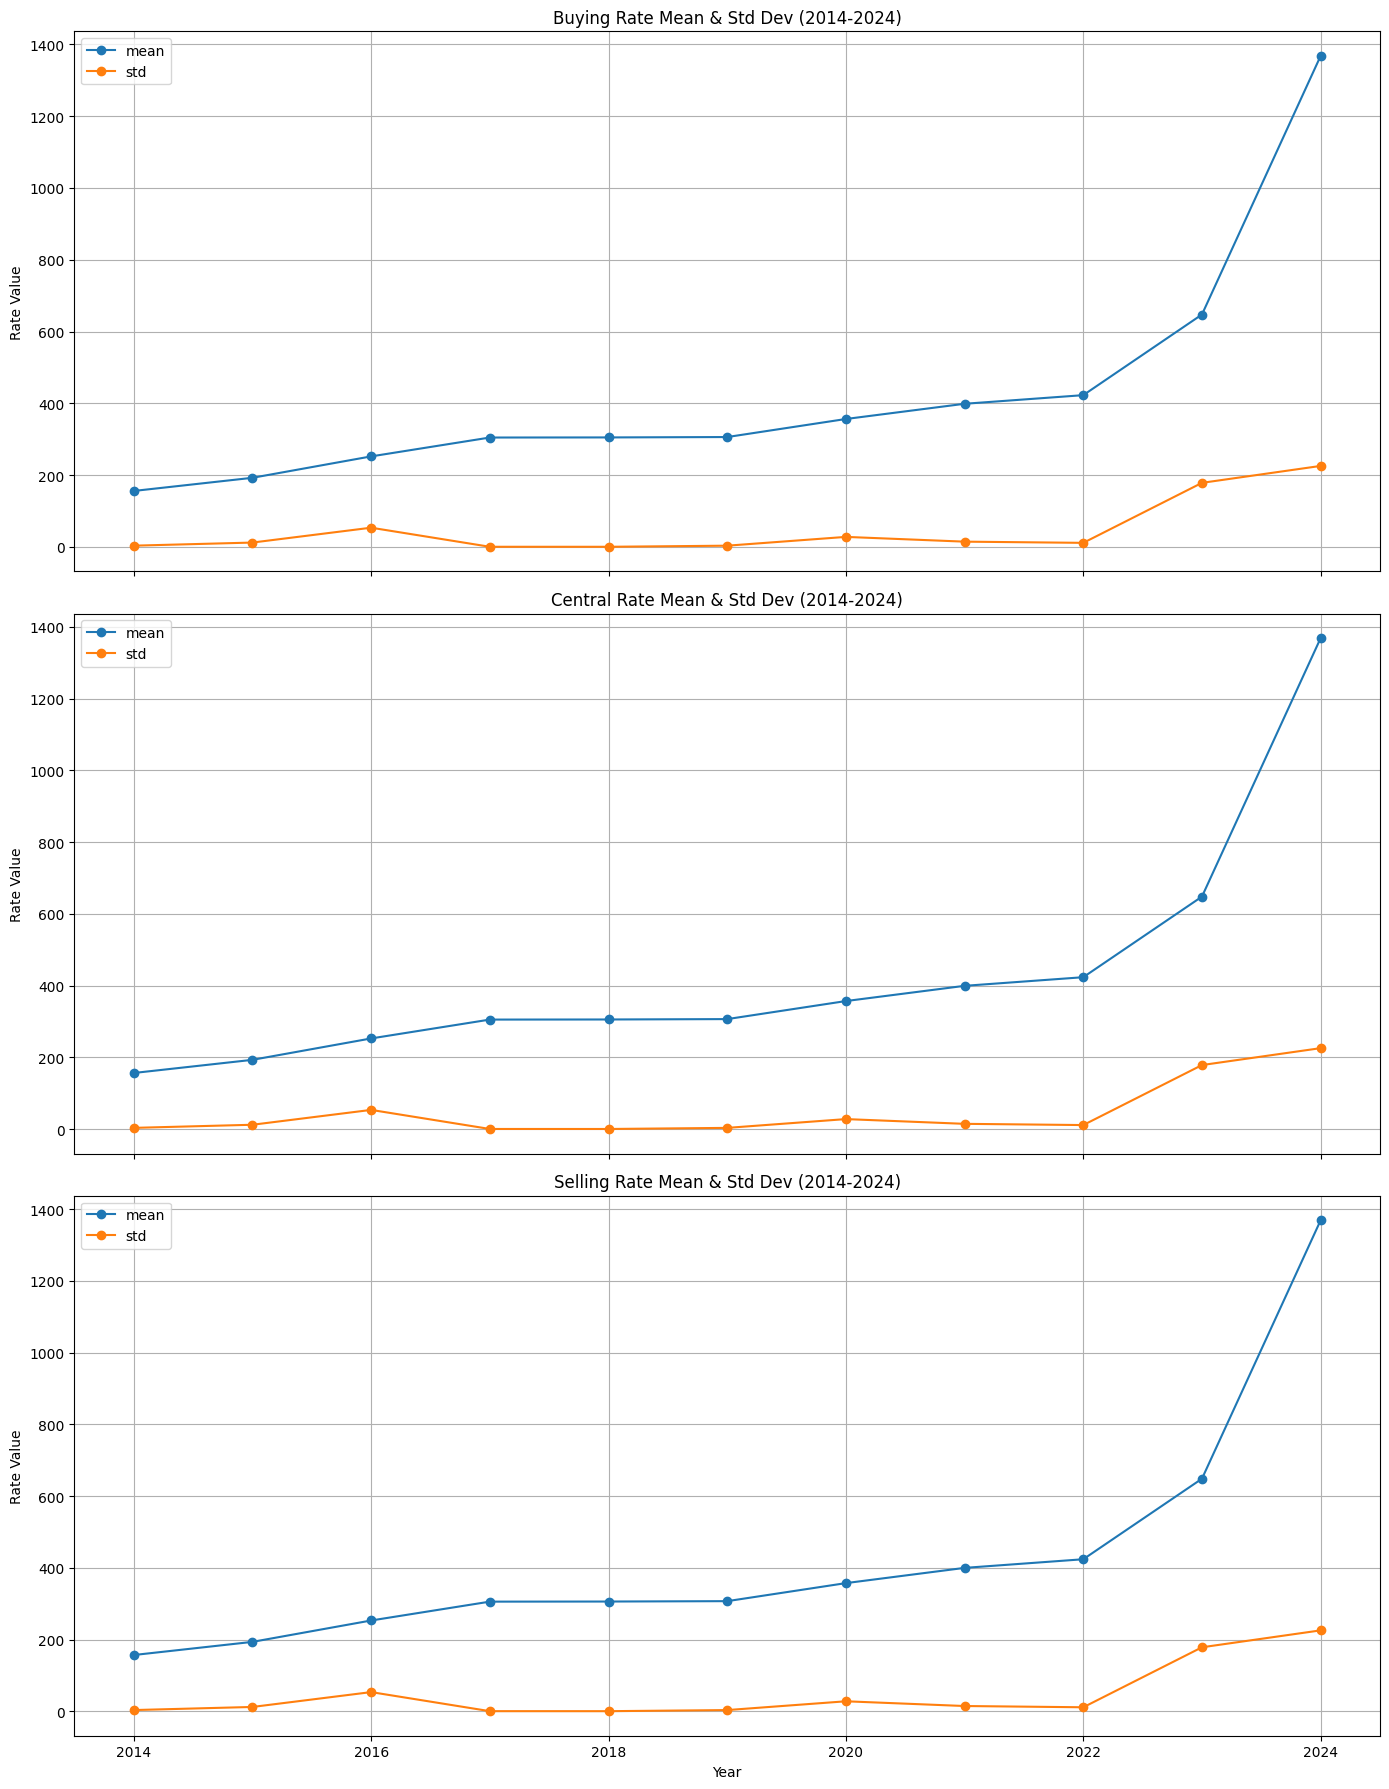

In [18]:
# Plotting only mean and standard deviation statistics
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18), sharex=True)

# Buying Rate Statistics (mean and std deviation)
usd_summary_statistics_filtered['Buying Rate'][['mean', 'std']].plot(ax=axes[0], title='Buying Rate Mean & Std Dev (2014-2024)', marker='o')
axes[0].set_ylabel('Rate Value')
axes[0].grid(True)

# Central Rate Statistics (mean and std deviation)
usd_summary_statistics_filtered['Central Rate'][['mean', 'std']].plot(ax=axes[1], title='Central Rate Mean & Std Dev (2014-2024)', marker='o')
axes[1].set_ylabel('Rate Value')
axes[1].grid(True)

# Selling Rate Statistics (mean and std deviation)
usd_summary_statistics_filtered['Selling Rate'][['mean', 'std']].plot(ax=axes[2], title='Selling Rate Mean & Std Dev (2014-2024)', marker='o')
axes[2].set_ylabel('Rate Value')
axes[2].grid(True)

# Set the x-axis label
axes[2].set_xlabel('Year')

plt.tight_layout()
plt.show()


# Plotting Anomalies

/var/folders/yp/c5rk54f5231bjlww9_pb2km40000gn/T/ipykernel_2526/3749822847.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usd_data['Date'] = pd.to_datetime(usd_data['Rate Year'].astype(str) + '-' + usd_data['Rate Month'])
/var/folders/yp/c5rk54f5231bjlww9_pb2km40000gn/T/ipykernel_2526/3749822847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_data['Date'] = pd.to_datetime(usd_data['Rate Year'].astype(str) + '-' + usd_data['Rate Month'])


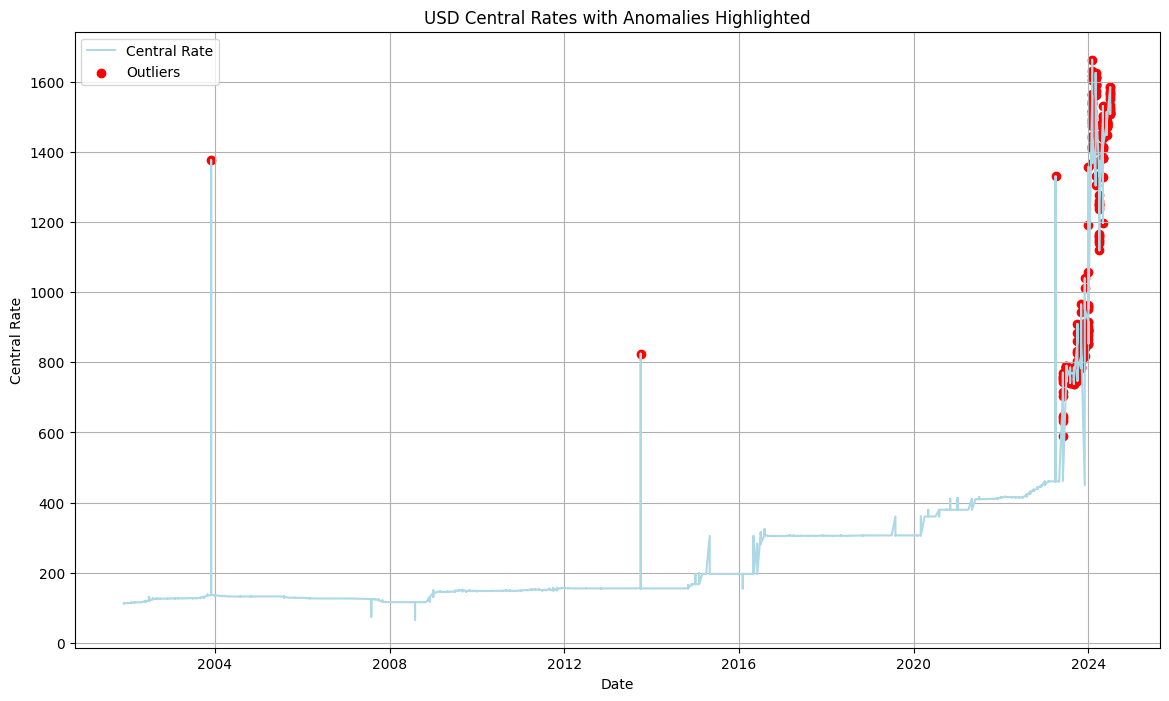

In [19]:
import numpy as np

# Ensure 'Date' column is correctly formatted and exists in the dataframe
usd_data['Date'] = pd.to_datetime(usd_data['Rate Year'].astype(str) + '-' + usd_data['Rate Month'])


# Calculate IQR and determine outliers for USD Buying Rate
usd_data_sorted = usd_data.sort_values('Date')
Q1 = usd_data_sorted['Central Rate'].quantile(0.25)
Q3 = usd_data_sorted['Central Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as any points lying 1.5 times the IQR below Q1 or above Q3
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

usd_data_sorted['Outlier'] = ((usd_data_sorted['Central Rate'] < outlier_lower_bound) | (usd_data_sorted['Central Rate'] > outlier_upper_bound))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(usd_data_sorted['Date'], usd_data_sorted['Central Rate'], label='Central Rate', color='lightblue')
ax.scatter(usd_data_sorted[usd_data_sorted['Outlier']]['Date'], usd_data_sorted[usd_data_sorted['Outlier']]['Central Rate'], color='red', label='Outliers')
ax.set_title('USD Central Rates with Anomalies Highlighted')
ax.set_xlabel('Date')
ax.set_ylabel('Central Rate')
ax.legend()
plt.grid(True)
plt.show()
